Primeiro Dataset: Informacoes de jogos internacionais de futebol.

Objetivo: 

* Trabalhar conceitos basicos de EDA (Exploratory Data Analysis)
* Uso da biblioteca Pandas
* Visualizacao de Dados Simples

Enredo:

Quais paises jogaram mais jogos internacionais?
O que acontece com a media de gols ao longo dos anos?


**Primeiro passo:** Importando bibliotecas

In [53]:

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt



Leio o dataset com os resultados e olhada inicial

In [54]:
df = pd.read_csv("../input/results.csv") #Leio o arquivo com os resultados
df.head() #Visualizacao inicial

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Crio uma feature porque quero analisar a quantidade total de gols nas partidas

In [55]:
df["total_goals"] = df["home_score"] + df["away_score"] #Crio uma feature com o total de gols na partida
df = df[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'total_goals', 'tournament', 'city', 'country', 'neutral' ]] #ajusto as colunas do meu dataset
df.head() #Resultado

,date,home_team,away_team,home_score,away_score,total_goals,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,6,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,3,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,4,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,3,Friendly,Glasgow,Scotland,False


**Segundo passo**: Analise da frequencia de jogos e quais paises jogaram mais jogos

In [56]:
df1 = df.groupby("away_team").size() + df.groupby("home_team").size() #Quero ver o quanto os paises jogaram
df1

Abkhazia                      21.0
Afghanistan                  105.0
Albania                      324.0
Alderney                      16.0
Algeria                      488.0
American Samoa                42.0
Andorra                      156.0
Angola                       336.0
Anguilla                      52.0
Antigua and Barbuda          184.0
Arameans Suryoye              10.0
Argentina                    965.0
Armenia                      202.0
Artsakh                        4.0
Aruba                        110.0
Australia                    512.0
Austria                      770.0
Azerbaijan                   237.0
Bahamas                       28.0
Bahrain                      472.0
Bangladesh                   200.0
Barawa                         NaN
Barbados                     251.0
Belarus                      242.0
Belgium                      760.0
Belize                        67.0
Benin                        244.0
Bermuda                      139.0
Bhutan              

In [57]:
df1 = df1.dropna() #Tiro os paises sem algum jogo ou com numero desconhecidos
df1 = df1.sort_values(ascending=False) #Ordeno os paises decrescente
df1

Sweden                     1008.0
England                     992.0
Brazil                      965.0
Argentina                   965.0
Germany                     941.0
Hungary                     920.0
Uruguay                     870.0
Korea Republic              851.0
Mexico                      849.0
France                      828.0
Poland                      803.0
Norway                      794.0
Italy                       793.0
Switzerland                 789.0
Denmark                     786.0
Netherlands                 776.0
Austria                     770.0
Scotland                    769.0
Belgium                     760.0
Chile                       748.0
Finland                     736.0
Paraguay                    703.0
Zambia                      697.0
Romania                     686.0
Russia                      683.0
Spain                       682.0
USA                         672.0
Bulgaria                    661.0
Trinidad and Tobago         650.0
Wales         

In [58]:
df1 = df1.iloc[:10] #Seleciono os 10 primeiros paises da lista
df1

Sweden            1008.0
England            992.0
Brazil             965.0
Argentina          965.0
Germany            941.0
Hungary            920.0
Uruguay            870.0
Korea Republic     851.0
Mexico             849.0
France             828.0
dtype: float64

[Text(0, 0.5, 'Numero de Jogos'), Text(0.5, 0, 'Paises')]

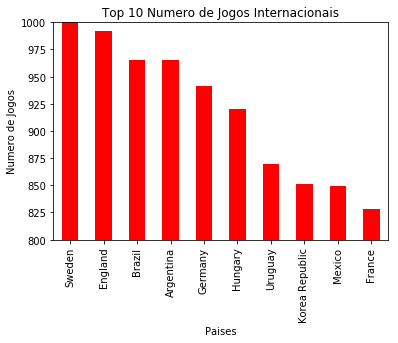

In [59]:
ax = df1.plot(kind='bar',title="Top 10 Numero de Jogos Internacionais",ylim=[800,1000],color='red') 
ax.set(xlabel="Paises", ylabel="Numero de Jogos") #Plot do Grafico de barras e funcao auxiliar pra colocar os labels

**Terceiro passo:** Media de Gols ao longo das decadas


In [60]:
df = df.set_index("date") #Trocando o indice
df.drop(["city","country","neutral","tournament"], axis=1)  #Retirando colunas do dataframe

,home_team,away_team,home_score,away_score,total_goals
date,,,,,
1872-11-30,Scotland,England,0,0,0
1873-03-08,England,Scotland,4,2,6
1874-03-07,Scotland,England,2,1,3
1875-03-06,England,Scotland,2,2,4
1876-03-04,Scotland,England,3,0,3
1876-03-25,Scotland,Wales,4,0,4
1877-03-03,England,Scotland,1,3,4
1877-03-05,Wales,Scotland,0,2,2
1878-03-02,Scotland,England,7,2,9


In [61]:
dec50 = df.loc["1950-01-01":"1959-12-31"] #Separo os datasets por decadas
dec60 = df.loc["1960-01-01":"1969-12-31"]
dec70 = df.loc["1970-01-01":"1979-12-31"]
dec80 = df.loc["1980-01-01":"1989-12-31"]
dec90 = df.loc["1990-01-01":"1999-12-31"]
dec00 = df.loc["2000-01-01":"2009-12-31"]
dec10 = df.loc["2010-01-01":"2019-12-31"]


In [62]:
media50 = dec50.total_goals.mean() #armazeno a media de gols de cada media em variaveis para imprimir depois
media60 = dec60.total_goals.mean() 
media70 = dec70.total_goals.mean() 
media80 = dec80.total_goals.mean() 
media90 = dec90.total_goals.mean()
media00 = dec00.total_goals.mean() 
media10 = dec10.total_goals.mean()
aumento = media10/media50 * 100
print("SEGUNDO PASSO: MEDIA DE GOLS AO LONGO DAS DECADAS \n50: %f \n60: %f \n70: %f \n80: %f \n90: %f \n00: %f \n10: %f\n" % (media50,media60,media70,media80,media90,media00,media10))
print("A media de gols diminuiu %f por cento desde 1950 ate hoje"% (aumento))

SEGUNDO PASSO: MEDIA DE GOLS AO LONGO DAS DECADAS 
50: 3.979644 
60: 3.469410 
70: 2.931210 
80: 2.485553 
90: 2.734566 
00: 2.792076 
10: 2.666199

A media de gols diminuiu 66.995933 por cento desde 1950 ate hoje


In [63]:
Medias = [media50, media60, media70, media80, media90, media00, media10] #Armazeno as variaveis criadas em um vetor
df_Medias = pd.DataFrame(Medias) #Crio um dataframe a partir do vetor
df_Medias.columns = ["Media de Gols"] #renomeio coluna
df_Medias.rename(index = {0: "Anos 50",  #renomeando linhas
                     1:"Anos 60",
                         2:"Anos 70",
                         3:"Anos 80",
                         4:"Anos 90",
                         5:"Anos 00",
                         6:"Anos 10"}, 
                                 inplace = True)
df_Medias

,Media de Gols
Anos 50,3.979644
Anos 60,3.469410
Anos 70,2.931210
Anos 80,2.485553
Anos 90,2.734566
Anos 00,2.792076
Anos 10,2.666199


[Text(0, 0.5, 'Media de Gols'), Text(0.5, 0, 'Decadas')]

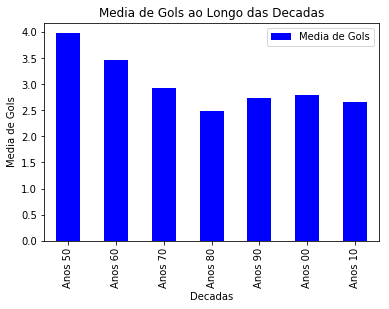

In [64]:
ax2 = df_Medias.plot(kind='bar',title="Media de Gols ao Longo das Decadas",color='blue') 
ax2.set(xlabel="Decadas", ylabel="Media de Gols") #Plot do Grafico de barras e funcao auxiliar pra colocar os labels

**Obrigado por visualizarem meu primeiro kernel :) Aberto a sugestoes :) **